# Edited MGeval Usage Demo : 


In [11]:
import glob
import numpy as np
import midi
import pretty_midi
 
import matplotlib.pyplot as plt
import core, utils
from sklearn.model_selection import LeaveOneOut

## Absolute measurement: statistic analysis


Assign dataset path

In [12]:
# set1 = glob.glob('../../midi/output/generation_test/t1/*.mid')
set1 = glob.glob('../../midi/examples/monophonic/*.mid')

set1

['../../midi/examples/monophonic\\africa_intro_2b.mid',
 '../../midi/examples/monophonic\\bohemian_isee_2b.mid',
 '../../midi/examples/monophonic\\bohemian_mama2_4b.mid',
 '../../midi/examples/monophonic\\bohemian_mama3_4b.mid',
 '../../midi/examples/monophonic\\bohemian_mama_4b.mid',
 '../../midi/examples/monophonic\\bohemian_solo_4b.mid',
 '../../midi/examples/monophonic\\mii1_4b.mid',
 '../../midi/examples/monophonic\\mii2_4b.mid',
 '../../midi/examples/monophonic\\mii3_4b.mid',
 '../../midi/examples/monophonic\\mii4_4b.mid',
 '../../midi/examples/monophonic\\mozar1_4b.mid',
 '../../midi/examples/monophonic\\mozar2_4b.mid',
 '../../midi/examples/monophonic\\mozar3_2b.mid',
 '../../midi/examples/monophonic\\mozar4_4b.mid',
 '../../midi/examples/monophonic\\pinkpanther2_4b.mid',
 '../../midi/examples/monophonic\\pinkpanther3_2b.mid',
 '../../midi/examples/monophonic\\pinkpanther_4b.mid',
 '../../midi/examples/monophonic\\twinkle1_4b.mid',
 '../../midi/examples/monophonic\\twinkle2_4b.

construct empty dictionary to fill in measurement across samples

In [13]:
num_samples = 20

In [14]:
set1_eval = {'total_used_pitch':np.zeros((num_samples,1))}
metrics_list = list(set1_eval)
for i in range(0, num_samples):
    feature = core.extract_feature(set1[i])
    set1_eval[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

repeat for second dataset

In [15]:
set2 = glob.glob('../../midi/output/generation_test/t1/*.mid')
set2_eval = {'total_used_pitch':np.zeros((num_samples,1))}
for i in range(0, num_samples):
    feature = core.extract_feature(set2[i])
    set2_eval[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

statistic analysis: absolute measurement

In [16]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print(' demo_set')
    print('  mean: ', np.mean(set1_eval[metrics_list[i]], axis=0))
    print('  std: ', np.std(set1_eval[metrics_list[i]], axis=0))

    print('------------------------')
    print(' demo_set')
    print('  mean: ', np.mean(set2_eval[metrics_list[i]], axis=0))
    print('  std: ', np.std(set2_eval[metrics_list[i]], axis=0))


total_used_pitch:
------------------------
 demo_set
  mean:  [7.35]
  std:  [2.88574081]
------------------------
 demo_set
  mean:  [4.]
  std:  [1.26491106]


## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

exhaustive cross-validation for intra-set distances measurement

In [17]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set1_eval[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(set2_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]][train_index])


exhaustive cross-validation for inter-set distances measurement

In [18]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]])

visualization of intra-set and inter-set distances

380


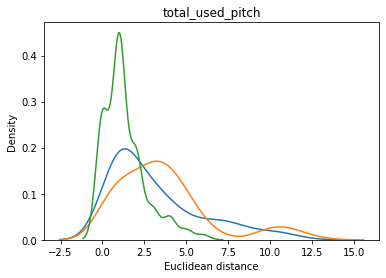

In [23]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

the difference of intra-set and inter-set distances.

In [20]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print(' demo_set1')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_set1_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_set1_intra[i], plot_sets_inter[i]))
    
    print(' demo_set2')
    print('  Kullback–Leibler divergence:',utils.kl_dist(plot_set2_intra[i], plot_sets_inter[i]))
    print('  Overlap area:', utils.overlap_area(plot_set2_intra[i], plot_sets_inter[i]))
    

total_used_pitch:
------------------------
 demo_set1
  Kullback–Leibler divergence: 0.09767332601327582
  Overlap area: 0.7430271609067662
 demo_set2
  Kullback–Leibler divergence: 0.07526193177456489
  Overlap area: 0.4741189169145875
